In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

C:\Users\lenovo\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df= pd.read_csv('daily_weather.csv')
df.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,high_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,1
1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,1


In [3]:
df.isnull().sum()

air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
high_humidity_3pm         0
dtype: int64

In [4]:
df.dropna(inplace = True)

In [5]:
df.shape

(1064, 10)

In [6]:
#check value of counts of output column to identify wheather data is balanced or imbalanced
df['high_humidity_3pm'].value_counts()

high_humidity_3pm
0    535
1    529
Name: count, dtype: int64

### ml process
1.identify input and output x&y.
2.split data (train test ).
3.encode the text values into numerocals.
4.scaling your data [standarization , normalization]

In [7]:
X = df.drop(columns = 'high_humidity_3pm')
y = df['high_humidity_3pm']

In [8]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.15)

In [9]:
dec_tree = DecisionTreeClassifier(criterion='gini',max_depth=4)
dec_tree.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=4)

In [10]:
# CART - GINIIMPURITY 
# ID3 - ENTROPY 

In [11]:
# features = X_train.columns


In [13]:
pd.DataFrame(features)

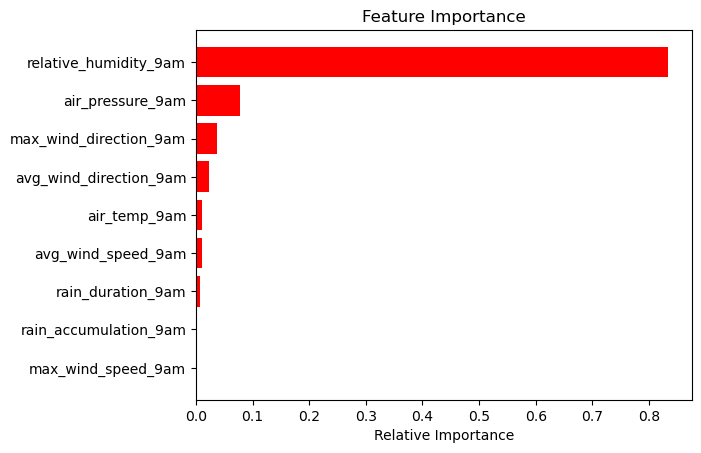

In [24]:
# v
import numpy as np
import matplotlib.pyplot as plt
importances = dec_tree.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [16]:
y_pred = dec_tree.predict(X_test)

In [17]:
y_test.shape

(160,)

In [18]:
y_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1], dtype=int64)

In [19]:
accuracy_score(y_test ,y_pred)  # 0.85
# after doitng hyperparameter turing #0.91875

0.88125

Merics used in classification 
1.acuracy score(USED WHEN BALANCED)
2.precision score
3.recall score
4.ROC AUC SCORE (USED WHEN IMBALACED DATA)

In [20]:
y_pred_train = dec_tree.predict(X_train)

In [21]:
accuracy_score(y_train ,y_pred_train)  # 0.85


0.9126106194690266